In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/starbucks/starbucks.csv


# Data Cleaning - Starbucks <br>
The objective of this work is to detect and correct corrupted data.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/kaggle/input/starbucks/starbucks.csv")
df.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


Check the columns name contained in the data

In [4]:
df.columns

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)',
       ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)',
       ' Sugars (g)', ' Protein (g) ', 'Vitamin A (% DV) ', 'Vitamin C (% DV)',
       ' Calcium (% DV) ', 'Iron (% DV) ', 'Caffeine (mg)'],
      dtype='object')

Some column names have extra whitespaces. <br>
The strip() function is used to remove any leading and trailing whitespaces.

In [5]:
df.columns = df.columns.str.strip()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Beverage_category        242 non-null    object 
 1   Beverage                 242 non-null    object 
 2   Beverage_prep            242 non-null    object 
 3   Calories                 242 non-null    int64  
 4   Total Fat (g)            242 non-null    object 
 5   Trans Fat (g)            242 non-null    float64
 6   Saturated Fat (g)        242 non-null    float64
 7   Sodium (mg)              242 non-null    int64  
 8   Total Carbohydrates (g)  242 non-null    int64  
 9   Cholesterol (mg)         242 non-null    int64  
 10  Dietary Fibre (g)        242 non-null    int64  
 11  Sugars (g)               242 non-null    int64  
 12  Protein (g)              242 non-null    float64
 13  Vitamin A (% DV)         242 non-null    object 
 14  Vitamin C (% DV)         2

#### Convert String to Numeric

###### Total Fat (g)

In [6]:
fat_null = pd.to_numeric(df['Total Fat (g)'], errors='coerce').isnull()
df[fat_null]

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
237,Frappuccino® Blended Crème,Strawberries & Crème (Without Whipped Cream),Soymilk,320,3 2,0.4,0.0,0,250,67,1,64,5.0,6%,8%,20%,10%,0


In the 'Total Fat (g)' column there is an incorrect writing of 3 2 which should be written 3.2

In [7]:
fat =[]
for i in df['Total Fat (g)']:
    if ' ' in i:
        fat.append(i.replace(' ', '.'))
    else:
        fat.append(i)
df['Total Fat (g)'] = fat

##### Vitamin A (% DV), Vitamin C (% DV), Calcium (% DV), Iron (% DV)

Remove the % character in the data

In [8]:
cols = ['Vitamin A (% DV)', 'Vitamin C (% DV)', 'Calcium (% DV)', 'Iron (% DV)']
df[cols] = df[cols].apply(lambda x: x.str.rstrip('%'))

##### Convert to numeric

In [9]:
cols_num = ['Total Fat (g)', 'Vitamin A (% DV)', 'Vitamin C (% DV)', 'Calcium (% DV)', 'Iron (% DV)', 'Caffeine (mg)']
df[cols_num] = df[cols_num].apply(lambda x: pd.to_numeric(x, errors='coerce'))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Beverage_category        242 non-null    object 
 1   Beverage                 242 non-null    object 
 2   Beverage_prep            242 non-null    object 
 3   Calories                 242 non-null    int64  
 4   Total Fat (g)            242 non-null    float64
 5   Trans Fat (g)            242 non-null    float64
 6   Saturated Fat (g)        242 non-null    float64
 7   Sodium (mg)              242 non-null    int64  
 8   Total Carbohydrates (g)  242 non-null    int64  
 9   Cholesterol (mg)         242 non-null    int64  
 10  Dietary Fibre (g)        242 non-null    int64  
 11  Sugars (g)               242 non-null    int64  
 12  Protein (g)              242 non-null    float64
 13  Vitamin A (% DV)         242 non-null    int64  
 14  Vitamin C (% DV)         2

The 'Caffeine (mg)' column has null data. <br>
Next, we will check which data is null

In [10]:
caffeine_null = pd.to_numeric(df['Caffeine (mg)'], errors='coerce').isnull()
df[caffeine_null]

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
102,Tazo® Tea Drinks,Tazo® Tea,Short,0,0.0,0.0,0.0,0,0,0,0,0,0.0,0,0,0,0.0,NaN
103,Tazo® Tea Drinks,Tazo® Tea,Tall,0,0.0,0.0,0.0,0,0,0,0,0,0.0,0,0,0,0.0,NaN
104,Tazo® Tea Drinks,Tazo® Tea,Grande,0,0.0,0.0,0.0,0,0,0,0,0,0.0,0,0,0,0.0,NaN
105,Tazo® Tea Drinks,Tazo® Tea,Venti,0,0.0,0.0,0.0,0,0,0,0,0,0.0,0,0,0,0.0,NaN
130,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,Short Nonfat Milk,80,0.1,0.1,0.0,0,45,16,0,16,4.0,6,0,10,0.0,NaN
131,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,2% Milk,90,2.0,1.0,0.1,10,50,15,0,15,3.0,6,0,10,0.0,NaN
132,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,Soymilk,80,1.5,0.2,0.0,0,40,14,0,13,3.0,4,0,10,6.0,NaN
133,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,Tall Nonfat Milk,120,0.1,0.1,0.0,5,65,23,0,23,5.0,10,0,20,0.0,NaN
134,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,2% Milk,140,3.0,1.5,0.1,15,75,23,0,23,5.0,8,0,15,0.0,NaN
135,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,Soymilk,130,2.5,0.3,0.0,0,60,21,1,19,4.0,6,0,20,8.0,NaN


null data on tazo tea will be ignored because there is no information about caffeine in tazo tea.

In [11]:
nontea_null = df[caffeine_null][~ (df[caffeine_null]['Beverage_category'].str.contains('Tea') | df[caffeine_null]['Beverage'].str.contains('Tea'))]
nontea_null

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
158,Shaken Iced Beverages,Iced Brewed Coffee (With Milk & Classic Syrup),2% Milk,90,1.0,0.5,0.0,5,25,18,0,18,2.0,2,0,6,0.0,NaN
172,Smoothies,Banana Chocolate Smoothie,Grande Nonfat Milk,280,2.5,1.5,0.0,5,150,53,7,34,20.0,10,15,20,0.0,NaN


##### Iced Brewed Coffee (With Milk & Classic Syrup)

In [12]:
df[df['Beverage'] == 'Iced Brewed Coffee (With Milk & Classic Syrup)']

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
157,Shaken Iced Beverages,Iced Brewed Coffee (With Milk & Classic Syrup),Tall Nonfat Milk,80,0.1,0.0,0.0,0,25,18,0,18,2.0,2,0,6,0.0,90.0
158,Shaken Iced Beverages,Iced Brewed Coffee (With Milk & Classic Syrup),2% Milk,90,1.0,0.5,0.0,5,25,18,0,18,2.0,2,0,6,0.0,NaN
159,Shaken Iced Beverages,Iced Brewed Coffee (With Milk & Classic Syrup),Soymilk,80,1.0,0.1,0.0,0,20,17,0,17,2.0,2,0,6,0.0,90.0
160,Shaken Iced Beverages,Iced Brewed Coffee (With Milk & Classic Syrup),Grande Nonfat Milk,110,0.1,0.0,0.0,0,30,24,0,24,2.0,4,0,8,2.0,90.0
161,Shaken Iced Beverages,Iced Brewed Coffee (With Milk & Classic Syrup),2% Milk,120,1.5,0.5,0.0,5,35,24,0,24,2.0,4,0,8,0.0,125.0
162,Shaken Iced Beverages,Iced Brewed Coffee (With Milk & Classic Syrup),Soymilk,110,1.0,0.1,0.0,0,30,23,0,22,2.0,2,0,8,0.0,125.0
163,Shaken Iced Beverages,Iced Brewed Coffee (With Milk & Classic Syrup),Venti Nonfat Milk,160,0.1,0.1,0.0,0,50,36,0,36,4.0,6,0,10,4.0,125.0
164,Shaken Iced Beverages,Iced Brewed Coffee (With Milk & Classic Syrup),2% Milk,180,2.0,1.0,0.1,10,55,36,0,36,4.0,6,0,10,0.0,170.0
165,Shaken Iced Beverages,Iced Brewed Coffee (With Milk & Classic Syrup),Soymilk,170,1.5,0.2,0.0,0,45,34,0,33,3.0,4,0,10,0.0,170.0


##### Data index 157-192

In [13]:
df[157:193]

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
157,Shaken Iced Beverages,Iced Brewed Coffee (With Milk & Classic Syrup),Tall Nonfat Milk,80,0.1,0.0,0.0,0,25,18,0,18,2.0,2,0,6,0.0,90.0
158,Shaken Iced Beverages,Iced Brewed Coffee (With Milk & Classic Syrup),2% Milk,90,1.0,0.5,0.0,5,25,18,0,18,2.0,2,0,6,0.0,NaN
159,Shaken Iced Beverages,Iced Brewed Coffee (With Milk & Classic Syrup),Soymilk,80,1.0,0.1,0.0,0,20,17,0,17,2.0,2,0,6,0.0,90.0
160,Shaken Iced Beverages,Iced Brewed Coffee (With Milk & Classic Syrup),Grande Nonfat Milk,110,0.1,0.0,0.0,0,30,24,0,24,2.0,4,0,8,2.0,90.0
161,Shaken Iced Beverages,Iced Brewed Coffee (With Milk & Classic Syrup),2% Milk,120,1.5,0.5,0.0,5,35,24,0,24,2.0,4,0,8,0.0,125.0
162,Shaken Iced Beverages,Iced Brewed Coffee (With Milk & Classic Syrup),Soymilk,110,1.0,0.1,0.0,0,30,23,0,22,2.0,2,0,8,0.0,125.0
163,Shaken Iced Beverages,Iced Brewed Coffee (With Milk & Classic Syrup),Venti Nonfat Milk,160,0.1,0.1,0.0,0,50,36,0,36,4.0,6,0,10,4.0,125.0
164,Shaken Iced Beverages,Iced Brewed Coffee (With Milk & Classic Syrup),2% Milk,180,2.0,1.0,0.1,10,55,36,0,36,4.0,6,0,10,0.0,170.0
165,Shaken Iced Beverages,Iced Brewed Coffee (With Milk & Classic Syrup),Soymilk,170,1.5,0.2,0.0,0,45,34,0,33,3.0,4,0,10,0.0,170.0
166,Shaken Iced Beverages,Shaken Iced Tazo® Tea (With Classic Syrup),Tall,60,0.0,0.0,0.0,0,0,15,0,15,0.0,0,0,0,6.0,170.0


From the data above there are possible writing errors from index 158-190 <br>
Next, the data will be corrected.

In [14]:
new = df.loc[158:189,'Caffeine (mg)'].replace([df[158:190]['Caffeine (mg)']],[df[159:191]['Caffeine (mg)']])
df.loc[158:190,'Caffeine (mg)'] = new
df.loc[190,'Caffeine (mg)'] = df.loc[191,'Caffeine (mg)']

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Beverage_category        242 non-null    object 
 1   Beverage                 242 non-null    object 
 2   Beverage_prep            242 non-null    object 
 3   Calories                 242 non-null    int64  
 4   Total Fat (g)            242 non-null    float64
 5   Trans Fat (g)            242 non-null    float64
 6   Saturated Fat (g)        242 non-null    float64
 7   Sodium (mg)              242 non-null    int64  
 8   Total Carbohydrates (g)  242 non-null    int64  
 9   Cholesterol (mg)         242 non-null    int64  
 10  Dietary Fibre (g)        242 non-null    int64  
 11  Sugars (g)               242 non-null    int64  
 12  Protein (g)              242 non-null    float64
 13  Vitamin A (% DV)         242 non-null    int64  
 14  Vitamin C (% DV)         2

In [16]:
df.duplicated().any()

False

### Data Correlation

In [17]:
numeric_columns = df.select_dtypes(include='number')
numeric_columns.corr()

,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
Calories,1.000000,0.632785,0.642818,0.331047,0.387892,0.795037,0.940034,0.384292,0.909675,0.578453,0.406820,0.215433,0.518720,0.427153,-0.045344
Total Fat (g),0.632785,1.000000,0.890175,0.619264,0.587177,0.449546,0.372713,0.259380,0.330443,0.550480,0.320870,-0.029391,0.619749,0.512175,0.108487
Trans Fat (g),0.642818,0.890175,1.000000,0.694871,0.707794,0.524176,0.439811,0.131267,0.419887,0.496317,0.305293,-0.048238,0.489494,0.344880,0.132072
Saturated Fat (g),0.331047,0.619264,0.694871,1.000000,0.920077,0.238142,0.161791,-0.093783,0.179255,0.287532,0.251557,-0.043146,0.287097,-0.066863,0.021709
Sodium (mg),0.387892,0.587177,0.707794,0.920077,1.000000,0.290295,0.199477,-0.060154,0.205969,0.496233,0.459001,0.023867,0.462052,-0.101201,0.054870
Total Carbohydrates (g),0.795037,0.449546,0.524176,0.238142,0.290295,1.000000,0.766654,0.173378,0.771407,0.410629,0.311687,0.016623,0.404887,0.306757,0.081176
Cholesterol (mg),0.940034,0.372713,0.439811,0.161791,0.199477,0.766654,1.000000,0.342040,0.984196,0.360449,0.242821,0.223852,0.263574,0.356257,-0.108321
Dietary Fibre (g),0.384292,0.259380,0.131267,-0.093783,-0.060154,0.173378,0.342040,1.000000,0.184171,0.540274,0.280673,0.709267,0.147316,0.584519,-0.211912
Sugars (g),0.909675,0.330443,0.419887,0.179255,0.205969,0.771407,0.984196,0.184171,1.000000,0.263061,0.188738,0.118918,0.236040,0.260414,-0.087326
Protein (g),0.578453,0.550480,0.496317,0.287532,0.496233,0.410629,0.360449,0.540274,0.263061,1.000000,0.799796,0.360997,0.839942,0.358413,0.010365


<Axes: >

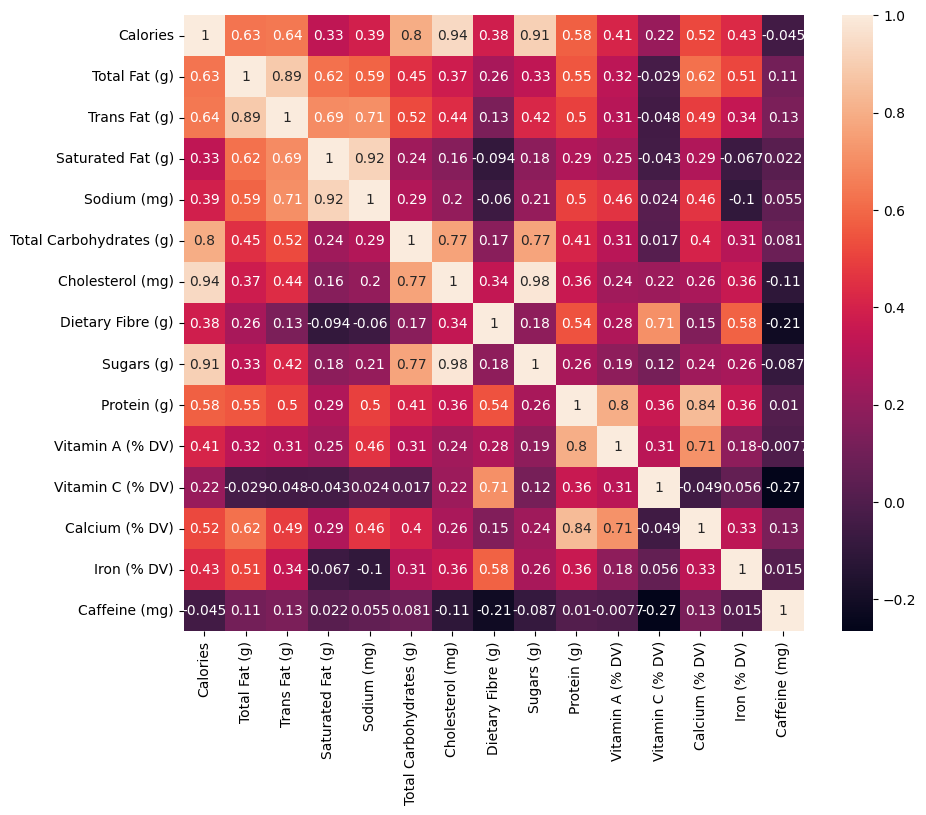

In [18]:
plt.figure(figsize=(10,8))
sns.heatmap(numeric_columns.corr(), annot = True)